In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/allen_lq2whpe/Desktop/Pytorch/Linear Regression/GPA.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
print("The number of rows are",df.shape[0])

The number of rows are 100


In [28]:
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

X_train = train['SAT']
X_train = torch.tensor(X_train.to_numpy())

y_train = train['GPA']
y_train = torch.tensor(y_train.to_numpy())

X_test = test['SAT']
X_test = torch.tensor(X_test.to_numpy())

y_test = test['GPA']
y_test = torch.tensor(y_test.to_numpy())

In [29]:
train.head()

,SAT,GPA,split
0,1714,2.40,-0.671173
1,1664,2.52,-0.160953
2,1760,2.54,-0.202564
3,1685,2.74,-1.563297
6,1764,3.00,-0.681930


In [30]:
test.head()

,SAT,GPA,split
4,1693,2.83,-2.064972
5,1670,2.91,0.324361
7,1764,3.00,1.756052
8,1792,3.01,0.017226
9,1850,3.01,0.300823


In [31]:
print(X_test.size())
print(y_test.size())

torch.Size([38])
torch.Size([38])


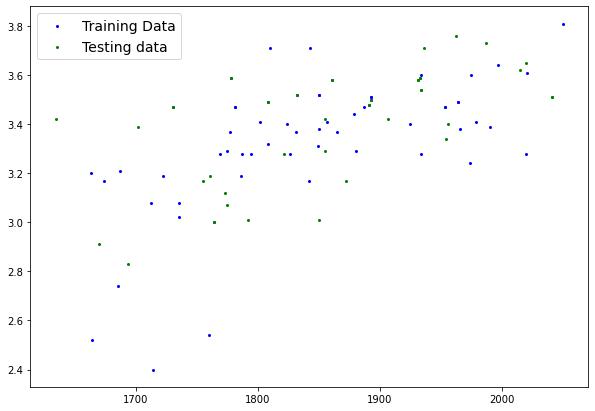

In [32]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14});
    
plot_predictions()

In [33]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x +self.bias # linear regression formula 

In [34]:
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.6455], requires_grad=True),
 Parameter containing:
 tensor([0.7089], requires_grad=True)]

In [36]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([1093.5063, 1078.6603, 1139.3354, 1157.4088, 1194.8467, 1146.4357,
        1145.1448, 1209.0472, 1133.5261, 1137.3990, 1176.1278, 1198.0741,
        1261.9766, 1099.3157, 1263.2676, 1198.0741, 1231.6390, 1055.4231,
        1117.3892, 1318.1334, 1249.0670, 1201.9470, 1247.1306, 1248.4215,
        1148.3722, 1301.3510, 1304.5782, 1250.3580, 1283.2775, 1267.1405,
        1221.3114, 1167.7366, 1222.6023, 1318.1334, 1183.2280, 1249.0670,
        1247.1306, 1248.4215])

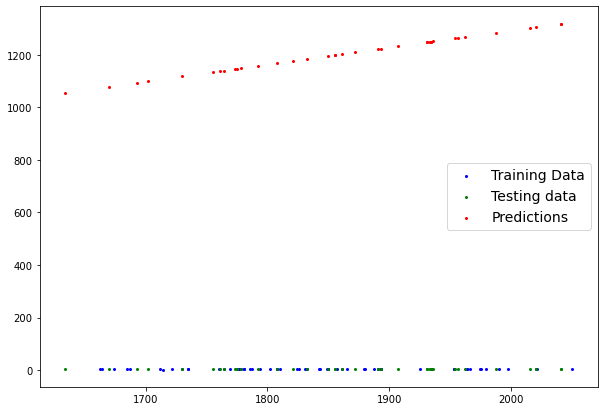

In [37]:
plot_predictions(predictions=y_preds)